### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Import the Dataset

In [2]:
gold_data = pd.read_csv('./gld_price_data.csv')

### Print First 5 Rows

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


### Print Last 5 Rows

In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


### Number of Rows and Columns

In [5]:
gold_data.shape

(2290, 6)

### Basic Information About the Dataset

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### Number of the Missing Values

In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Statistical Measures of the Dataset 

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation
<ul>
    <li>Positive</li>
    <li>Negative</li>
</ul>

In [9]:
correlation = gold_data.drop(['Date'],axis=1).corr()

### Heatmap

<Axes: >

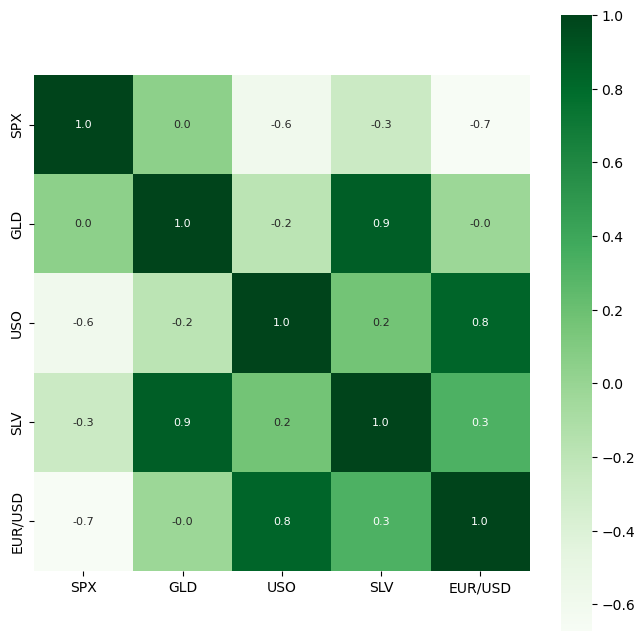

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

### Correlation Values of GLD

In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


### Check Distribution of GLD Price

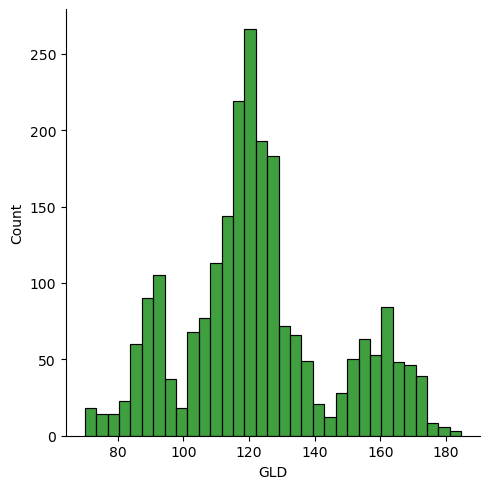

In [12]:
sns.displot(gold_data['GLD'], color='green')

### Splitting Features and Target

In [13]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Split the Dataset into Training and Testing

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Model Training
- Random Forest Regression

In [17]:
regressor = RandomForestRegressor(n_estimators = 100)

### Train the Model

In [18]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### Model Evaluation

Predication

In [19]:
test_data_predication = regressor.predict(X_test)

In [20]:
print(test_data_predication)

[168.86699996  81.71319987 116.05309992 127.58870074 120.69270152
 154.64219743 150.78539951 126.23840055 117.55659881 125.93980034
 116.70660107 172.21690078 142.50359866 167.77579848 115.05979994
 117.76100045 138.48850389 170.04780097 159.34890284 159.08129919
 155.16910011 125.40830009 176.37879893 156.78470234 125.18050023
  93.58669971  77.76690005 120.64379989 119.06279931 167.4581999
  88.19750049 125.26920017  91.16230086 117.66890019 121.17049883
 136.73760119 115.54450129 115.35230074 148.89690002 107.34150118
 103.83990229  87.29609788 126.47980062 117.61690061 154.55699907
 119.66949982 108.46339989 108.15539794  93.33770063 127.01349782
  75.31180036 113.50299879 121.46670044 111.17039908 118.85479863
 120.52579974 158.51779979 168.25720106 146.93679686  85.94359872
  94.33310058  86.762899    90.44769985 119.01130073 126.48580044
 127.59390005 168.27660027 122.18589929 117.22479903  98.74120032
 167.47440144 143.25279825 131.89790275 121.14110214 120.81989948
 119.740000

### R Squared Error

In [21]:
error_score = metrics.r2_score(Y_test, test_data_predication)
print("R Squared Error : ", error_score)

R Squared Error :  0.9888874312693919


### Visualize Comparison Between Actual and Predicated Values

In [22]:
Y_test = list(Y_test)

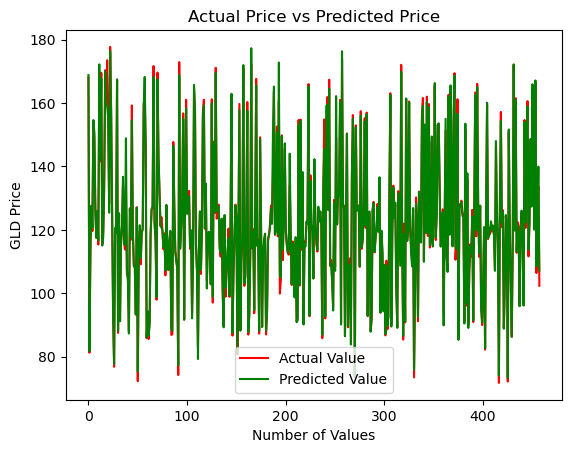

In [23]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(test_data_predication, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()